### Background check

Locally weighted linear regression is a non-parametric method for fitting data points. What does that mean?

- Instead of fitting a single regression line, you fit many linear regression models. The final resulting smooth curve is the product of all those regression models.
- Obviously, we can't fit the same linear model again and again. Instead, for each linear model we want to fit, we find a point x and use that for fitting a local regression model.
- We find points that closest to x to fit each of our local regression model. That's why you'll see the algorithm is also known as nearest neighbours algorithm in the literature.

Now, if your data points have the x-values from 1 to 100: [1,2,3 ... 98, 99, 100]. The algorithm would fit a linear model for 1,2,3...,98,99,100. That means, you'll have 100 regression models.

Source: Stackoverflow

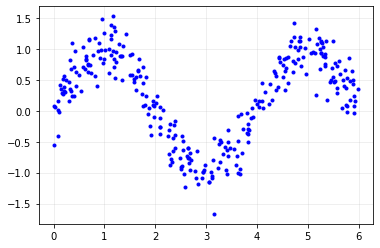

In [2]:
import numpy as np
import matplotlib.pyplot as plt

n=300

x = np.random.uniform(0,6,n)
y = np.sin(np.pi * x/2) + np.random.normal(0,0.25,n)
# print(x[0])
# print(y[0])
W = np.array(n,)
fig1 = plt.figure()
# ax = plt.axes()
plt.grid(axis='both', alpha=.25)
plt.plot(x,y,'b.')
plt.show()
# print(y)
# y.shape

## Splitting the data

In [2]:

train_split = len(x) *80 /100
test_split = len(x) * 20/100


train_x = x[:int(train_split)]
train_y = y[:int(train_split)]
validation_x = x[int(train_split):]
validation_y  = y[int(train_split):]
# validation_y.shape
validation_x[0]
print(train_y.shape)

(240,)


### RBF kernel in sklearn



In [3]:
from sklearn.metrics.pairwise import rbf_kernel as rbf

def calculate_theta(x, tau):    
    X = np.c_[np.ones(len(train_x)), train_x]
    W = rbf(x.reshape(-1,1), X[:,1].reshape(-1,1), 2*tau*tau)
    xw = X.T * W
    theta = np.linalg.pinv(xw.T * X) * xw * train_y
    return theta

# a = rbf(train_x[0].reshape(-1,1),validation_x[0].reshape(-1,1), 2*0.2*0.2)
# b = rbf(train_x.reshape(-1,1),validation_x[0].reshape(-1,1), 2*0.3*0.3)

## Loss function

In [4]:
def loss(X, y, theta):
    error = y - X.dot(theta)
    error = error.T * error
    return error.sum()

#### with Tau

In [10]:
tau = 0.2
err=0
for i in range(len(validation_x)):
    theta = calculate_theta(validation_x[i], tau)
    x = np.r_[1, validation_x[i]]
    predict = theta.T.dot(x)
    err += loss(x, train_y, theta)

print("with tau=",tau, "error: ",err)
      

with tau= 0.2 error:  8185.417803903393


## Selecting the best possible tau
  
  
  Between 0.1 and 3 with 0.1 difference between each values.

In [12]:
tau = np.arange(0.1,3,0.1)
err = np.empty_like(tau)
optimal = 0
min_error = float("inf")
# print(min_error)
for j in range(len(tau)):
    for i in range(len(validation_x)):
        theta = calculate_theta(validation_x[i], tau[j])
        x = np.r_[1, validation_x[i]]
        predict = theta.T.dot(x)
        err[j] += loss(x, train_y, theta)
    if err[j] < min_error:
        min_error = err[j]
        optimal = tau[j]

print("Best tau: ", optimal , " with error: ", min_error)

Best tau:  2.1  with error:  8181.094027038583


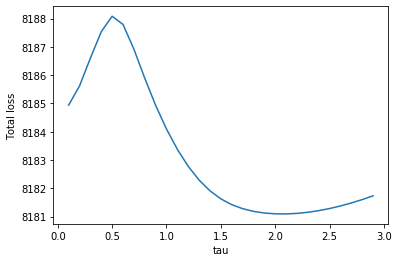

In [13]:
fig = plt.figure()
plt.xlabel('tau')
plt.ylabel('Total loss')
plt.plot(tau, err)